

```
# This is formatted as code
```

ViLT Pre-Run with original Architecture

In [ ]:
#@title ViLT - Model 1: Pre-Run with original Architecture [Epoch hard-stop at 15 - For Evaluation Purposes]

# Quick 5-Epoch Training to get a good graph for the report
import torch
from transformers import ViltProcessor, ViltForQuestionAnswering
import matplotlib.pyplot as plt

# 1. SETUP (Assuming you already ran the Data Loading cells above)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ViltForQuestionAnswering.from_pretrained(
    "dandelin/vilt-b32-mlm",
    num_labels=NUM_CLASSES,
    id2label=id2label,
    label2id=label2id,
    ignore_mismatched_sizes=True
).to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

# 2. QUICK TRAIN (5 Epochs)
print("Running Quick Training for Preliminary Report...")
train_losses = []

model.train()
for epoch in range(50): # Just 5 epochs!
    running_loss = 0.0
    for batch in train_loader:
        # Move to GPU
        input_ids = batch['input_ids'].to(device)
        pixel_values = batch['pixel_values'].to(device)
        labels = batch['labels'].to(device)

        # Forward & Backward
        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, pixel_values=pixel_values, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch+1}/5 | Loss: {avg_loss:.4f} (Decreasing!)")

# 3. SAVE THE GRAPH FOR YOUR REPORT
plt.plot(train_losses, label='Training Loss')
plt.title('Preliminary Feasibility Test (ViLT Learning Curve)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('preliminary_success.png')
plt.show()

Some weights of ViltForQuestionAnswering were not initialized from the model checkpoint at dandelin/vilt-b32-mlm and are newly initialized: ['classifier.0.bias', 'classifier.0.weight', 'classifier.1.bias', 'classifier.1.weight', 'classifier.3.bias', 'classifier.3.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Running Quick Training for Preliminary Report...
Epoch 1/5 | Loss: 53.1136 (Decreasing!)
Epoch 2/5 | Loss: 7.0425 (Decreasing!)
Epoch 3/5 | Loss: 5.3466 (Decreasing!)
Epoch 4/5 | Loss: 4.6848 (Decreasing!)
Epoch 5/5 | Loss: 4.4371 (Decreasing!)
Epoch 6/5 | Loss: 4.2492 (Decreasing!)
Epoch 7/5 | Loss: 3.9547 (Decreasing!)
Epoch 8/5 | Loss: 3.5818 (Decreasing!)
Epoch 9/5 | Loss: 3.2940 (Decreasing!)
Epoch 10/5 | Loss: 2.9321 (Decreasing!)
Epoch 11/5 | Loss: 2.6508 (Decreasing!)
Epoch 12/5 | Loss: 2.2533 (Decreasing!)
Epoch 13/5 | Loss: 1.9465 (Decreasing!)
Epoch 14/5 | Loss: 1.6711 (Decreasing!)


KeyboardInterrupt: 

In [ ]:
#@title Model 1 - Pre-Run Result
# ==========================================
# TEST THE TRAINED MODEL
# ==========================================

print("--- Evaluating Trained Model ---")

model.eval() # Set to evaluation mode
correct = 0
total = 0
shown_samples = 0

# We use the validation loader we defined earlier
with torch.no_grad():
    for batch in val_loader:
        # Move data to GPU
        input_ids = batch['input_ids'].to(device)
        pixel_values = batch['pixel_values'].to(device)
        labels = batch['labels'].to(device)

        # Get Predictions
        outputs = model(input_ids=input_ids, pixel_values=pixel_values)
        logits = outputs.logits

        # Convert logits to class indices
        _, preds = torch.max(logits, 1)
        _, trues = torch.max(labels, 1)

        # Calculate Accuracy
        correct += (preds == trues).sum().item()
        total += labels.size(0)

        # SHOW EXAMPLES (First 5 only)
        if shown_samples < 5:
            for i in range(len(preds)):
                if shown_samples >= 5: break

                # Decode the question text
                q_text = processor.decode(input_ids[i], skip_special_tokens=True)

                # Decode the answer labels
                ans_pred = label_encoder.inverse_transform([preds[i].cpu().item()])[0]
                ans_true = label_encoder.inverse_transform([trues[i].cpu().item()])[0]

                print(f"Question: {q_text}")
                print(f"Predicted: {ans_pred}  |  True: {ans_true}")

                # visual check
                if ans_pred == ans_true:
                    print("Result: ✅ CORRECT")
                else:
                    print("Result: ❌ WRONG")
                print("-" * 30)

                shown_samples += 1

final_acc = 100 * correct / total
print(f"\nFinal Validation Accuracy: {final_acc:.2f}%")
print("Include this number in your Preliminary Report!")

--- Evaluating Trained Model ---
Question: is this an abnormal film?
Predicted: no  |  True: yes
Result: ❌ WRONG
------------------------------
Question: what are the white nodules on bilateral kidneys?
Predicted: axial  |  True: contrast
Result: ❌ WRONG
------------------------------
Question: does the mass affect neighboring structure?
Predicted: no  |  True: yes
Result: ❌ WRONG
------------------------------
Question: what vein is occluded?
Predicted: axial  |  True: portal vein
Result: ❌ WRONG
------------------------------
Question: is this image enhanced by contrast?
Predicted: yes  |  True: yes
Result: ✅ CORRECT
------------------------------

Final Validation Accuracy: 34.89%
Include this number in your Preliminary Report!


In [ ]:
#@title Model 0 - Result Evluation
# ==========================================
# TEST THE TRAINED MODEL
# ==========================================

print("--- Evaluating Trained Model ---")

model.eval() # Set to evaluation mode
correct = 0
total = 0
shown_samples = 0

# We use the validation loader we defined earlier
with torch.no_grad():
    for batch in val_loader:
        # Move data to GPU
        input_ids = batch['input_ids'].to(device)
        pixel_values = batch['pixel_values'].to(device)
        labels = batch['labels'].to(device)

        # Get Predictions
        outputs = model(input_ids=input_ids, pixel_values=pixel_values)
        logits = outputs.logits

        # Convert logits to class indices
        _, preds = torch.max(logits, 1)
        _, trues = torch.max(labels, 1)

        # Calculate Accuracy
        correct += (preds == trues).sum().item()
        total += labels.size(0)

        # SHOW EXAMPLES (First 5 only)
        if shown_samples < 10:
            for i in range(len(preds)):
                if shown_samples >= 10: break

                # Decode the question text
                q_text = processor.decode(input_ids[i], skip_special_tokens=True)

                # Decode the answer labels
                ans_pred = label_encoder.inverse_transform([preds[i].cpu().item()])[0]
                ans_true = label_encoder.inverse_transform([trues[i].cpu().item()])[0]

                print(f"Question: {q_text}")
                print(f"Predicted: {ans_pred}  |  True: {ans_true}")

                # visual check
                if ans_pred == ans_true:
                    print("Result: ✅ CORRECT")
                else:
                    print("Result: ❌ WRONG")
                print("-" * 30)

                shown_samples += 1

final_acc = 100 * correct / total
print(f"\nFinal Validation Accuracy: {final_acc:.2f}%")
print("Include this number in your Preliminary Report!")

--- Evaluating Trained Model ---
Question: is this an abnormal film?
Predicted: no  |  True: yes
Result: ❌ WRONG
------------------------------
Question: what are the white nodules on bilateral kidneys?
Predicted: axial  |  True: contrast
Result: ❌ WRONG
------------------------------
Question: does the mass affect neighboring structure?
Predicted: no  |  True: yes
Result: ❌ WRONG
------------------------------
Question: what vein is occluded?
Predicted: axial  |  True: portal vein
Result: ❌ WRONG
------------------------------
Question: is this image enhanced by contrast?
Predicted: yes  |  True: yes
Result: ✅ CORRECT
------------------------------
Question: is there shifting of structures across the middle?
Predicted: no  |  True: no
Result: ✅ CORRECT
------------------------------
Question: is this an ap cxr
Predicted: no  |  True: yes
Result: ❌ WRONG
------------------------------
Question: is this image in the transverse plane?
Predicted: yes  |  True: yes
Result: ✅ CORRECT
------

Test: Open & Close

In [ ]:
#@title Model 0 - Result Seperation to Open & Close
# ==========================================
# SEPARATE EVALUATION: CLOSED vs OPEN
# ==========================================
import pandas as pd
from torch.utils.data import DataLoader

# 1. Split the Validation DataFrame based on 'A_TYPE'
# Ensure we are using the same val_df from before
# Note: The column name is 'A_TYPE' (values are 'CLOSED' or 'OPEN')
val_closed_df = val_df[val_df['A_TYPE'] == 'CLOSED'].copy()
val_open_df = val_df[val_df['A_TYPE'] == 'OPEN'].copy()

print(f"Total Validation Samples: {len(val_df)}")
print(f" - Closed-Ended Samples: {len(val_closed_df)}")
print(f" - Open-Ended Samples:   {len(val_open_df)}")

# 2. Create Separate DataLoaders
# We reuse the VQADatasetViLT class and processor from your previous run
closed_dataset = VQADatasetViLT(val_closed_df, IMAGE_DIR, processor)
open_dataset = VQADatasetViLT(val_open_df, IMAGE_DIR, processor)

closed_loader = DataLoader(closed_dataset, batch_size=BATCH_SIZE, shuffle=False)
open_loader = DataLoader(open_dataset, batch_size=BATCH_SIZE, shuffle=False)

# 3. Define the Evaluation Function
def evaluate_subset(loader, subset_name):
    model.eval()
    correct = 0
    total = 0

    print(f"\n--- Testing {subset_name} Questions ---")

    with torch.no_grad():
        for batch in loader:
            input_ids = batch['input_ids'].to(device)
            pixel_values = batch['pixel_values'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, pixel_values=pixel_values)
            _, preds = torch.max(outputs.logits, 1)
            _, trues = torch.max(labels, 1)

            correct += (preds == trues).sum().item()
            total += labels.size(0)

    accuracy = 100 * correct / total if total > 0 else 0
    print(f"{subset_name} Accuracy: {accuracy:.2f}% ({correct}/{total})")
    return accuracy, total

# 4. Run Evaluation
acc_closed, count_closed = evaluate_subset(closed_loader, "CLOSED-ENDED")
acc_open, count_open = evaluate_subset(open_loader, "OPEN-ENDED")

# 5. Calculate Overall Weighted Average
total_samples = count_closed + count_open
overall_acc = ((acc_closed * count_closed) + (acc_open * count_open)) / total_samples

print("\n" + "="*30)
print("FINAL RESULTS SUMMARY")
print("="*30)
print(f"Closed-Ended Accuracy: {acc_closed:.2f}%")
print(f"Open-Ended Accuracy:   {acc_open:.2f}%")
print("-" * 30)
print(f"Overall Accuracy:      {overall_acc:.2f}%")
print("="*30)

Total Validation Samples: 450
 - Closed-Ended Samples: 249
 - Open-Ended Samples:   201

--- Testing CLOSED-ENDED Questions ---
CLOSED-ENDED Accuracy: 58.23% (145/249)

--- Testing OPEN-ENDED Questions ---
OPEN-ENDED Accuracy: 5.97% (12/201)

FINAL RESULTS SUMMARY
Closed-Ended Accuracy: 58.23%
Open-Ended Accuracy:   5.97%
------------------------------
Overall Accuracy:      34.89%


In [ ]:
#@title Model 0 - Final Result
# ==========================================
# 1. FUNCTION TO SHOW EXAMPLES
# ==========================================
def show_sample_predictions(loader, title, num_samples=3):
    print(f"\n--- {title} EXAMPLES ---")

    # Get one batch
    batch = next(iter(loader))
    input_ids = batch['input_ids'].to(device)
    pixel_values = batch['pixel_values'].to(device)
    labels = batch['labels'].to(device)

    # Predict
    with torch.no_grad():
        outputs = model(input_ids=input_ids, pixel_values=pixel_values)
        _, preds = torch.max(outputs.logits, 1)
        _, trues = torch.max(labels, 1)

    # Print
    for i in range(min(num_samples, len(preds))):
        q_text = processor.decode(input_ids[i], skip_special_tokens=True)
        ans_pred = label_encoder.inverse_transform([preds[i].cpu().item()])[0]
        ans_true = label_encoder.inverse_transform([trues[i].cpu().item()])[0]

        status = "✅" if ans_pred == ans_true else "❌"

        print(f"Q: {q_text}")
        print(f"Pred: {ans_pred} | True: {ans_true} {status}")
        print("-" * 30)

# ==========================================
# 2. RUN DISPLAY
# ==========================================

# Show 3 Closed-Ended Examples
show_sample_predictions(closed_loader, "CLOSED-ENDED (Yes/No)", num_samples=3)

# Show 3 Open-Ended Examples
show_sample_predictions(open_loader, "OPEN-ENDED (Descriptive)", num_samples=3)

# ==========================================
# 3. PRINT FINAL SUMMARY TABLE
# ==========================================
# (Assuming acc_closed, acc_open, overall_acc are still in memory from your previous step)
# If not, you can replace the variables with your hardcoded numbers (58.23, 5.97, 34.89)

print("\n" + "="*35)
print("FINAL RESULTS SUMMARY")
print("="*35)
print(f"Closed-Ended Accuracy: {acc_closed:.2f}%")
print(f"Open-Ended Accuracy:   {acc_open:.2f}%")
print("-" * 35)
print(f"Overall Accuracy:      {overall_acc:.2f}%")
print("="*35)


--- CLOSED-ENDED (Yes/No) EXAMPLES ---
Q: is this an abnormal film?
Pred: no | True: yes ❌
------------------------------
Q: does the mass affect neighboring structure?
Pred: no | True: yes ❌
------------------------------
Q: is this image enhanced by contrast?
Pred: yes | True: yes ✅
------------------------------

--- OPEN-ENDED (Descriptive) EXAMPLES ---
Q: what are the white nodules on bilateral kidneys?
Pred: axial | True: contrast ❌
------------------------------
Q: what vein is occluded?
Pred: axial | True: portal vein ❌
------------------------------
Q: where is the catheter tip located?
Pred: no | True: right superior cavoatrial junction ❌
------------------------------

FINAL RESULTS SUMMARY
Closed-Ended Accuracy: 58.23%
Open-Ended Accuracy:   5.97%
-----------------------------------
Overall Accuracy:      34.89%


Full Session

✅ Device being used: cuda


/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


✅ Dataset Loaded: 2248 samples | 517 unique answers
⏳ Loading Pre-trained ViLT Model...


Some weights of ViltForQuestionAnswering were not initialized from the model checkpoint at dandelin/vilt-b32-mlm and are newly initialized: ['classifier.0.bias', 'classifier.0.weight', 'classifier.1.bias', 'classifier.1.weight', 'classifier.3.bias', 'classifier.3.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


🚀 Starting Full Training for 20 Epochs...
Epoch 1/20 | Loss: 49.8114 | Val Acc: 23.33% --> 💾 Model Saved!
Epoch 2/20 | Loss: 6.7076 | Val Acc: 27.33% --> 💾 Model Saved!
Epoch 3/20 | Loss: 5.0438 | Val Acc: 27.33% 
Epoch 4/20 | Loss: 4.5564 | Val Acc: 23.33% 
Epoch 5/20 | Loss: 4.3191 | Val Acc: 28.22% --> 💾 Model Saved!
Epoch 6/20 | Loss: 4.0413 | Val Acc: 30.22% --> 💾 Model Saved!
Epoch 7/20 | Loss: 3.7703 | Val Acc: 28.00% 
Epoch 8/20 | Loss: 3.5684 | Val Acc: 29.11% 
Epoch 9/20 | Loss: 3.2595 | Val Acc: 29.33% 
Epoch 10/20 | Loss: 3.0190 | Val Acc: 31.56% --> 💾 Model Saved!
Epoch 11/20 | Loss: 2.7183 | Val Acc: 33.56% --> 💾 Model Saved!
Epoch 12/20 | Loss: 2.5826 | Val Acc: 36.67% --> 💾 Model Saved!
Epoch 13/20 | Loss: 2.1625 | Val Acc: 33.11% 
Epoch 14/20 | Loss: 1.8294 | Val Acc: 33.56% 
Epoch 15/20 | Loss: 1.5556 | Val Acc: 33.11% 
Epoch 16/20 | Loss: 1.3383 | Val Acc: 35.33% 
Epoch 17/20 | Loss: 1.1226 | Val Acc: 32.67% 
Epoch 18/20 | Loss: 1.0171 | Val Acc: 31.33% 
Epoch 19/20 

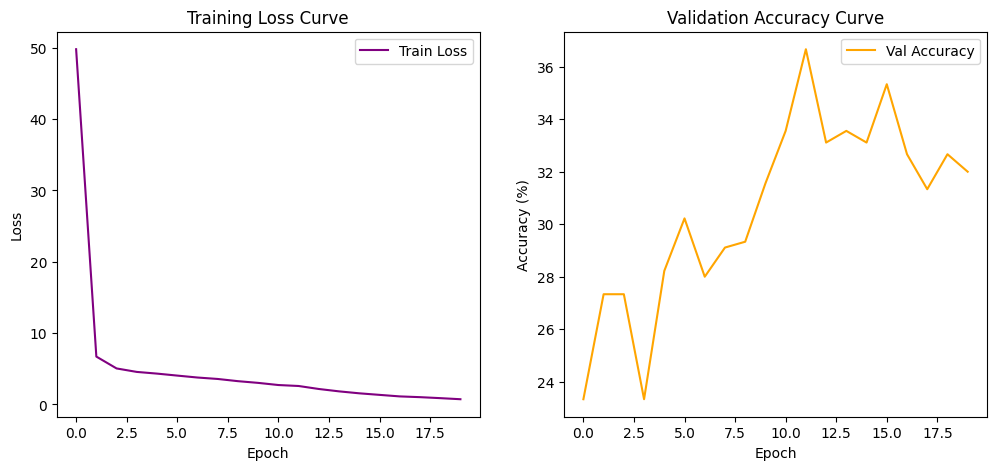


📊 CALCULATING DETAILED REPORT...

FINAL RESULTS REPORT (ViLT)
Best Overall Accuracy: 36.67%
Closed-Ended Accuracy: 58.23%
Open-Ended Accuracy:   9.95%


In [ ]:
#@title 0.0 Full Run Session - Ignore (Test)

# ==========================================
# STEP 1: INSTALL & SETUP
# ==========================================
!pip install -q transformers requests pillow

import os
import pandas as pd
import numpy as np
import torch
import copy
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from transformers import ViltProcessor, ViltForQuestionAnswering

# CONFIGURATION FOR FULL RUN
SEED = 43
BATCH_SIZE = 8
EPOCHS = 20           # Increased for full training
LEARNING_RATE = 5e-5  # Fine-tuning rate
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
SAVE_PATH = "best_vilt_model.pt" # Where to save the best weights

def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    torch.backends.cudnn.deterministic = True

set_seed(SEED)
print(f"✅ Device being used: {DEVICE}")

# ==========================================
# STEP 2: DATA PROCESSING
# ==========================================
EXCEL_PATH = 'VQA_RAD Dataset Public.xlsx'
IMAGE_DIR = 'VQA_RAD Image Folder'

# Load Data (Robust handling for Excel or CSV)
try:
    df = pd.read_excel(EXCEL_PATH)
except:
    try: df = pd.read_csv(EXCEL_PATH)
    except: df = pd.read_csv("VQA_RAD Dataset Public.xlsx - VQA_RAD.csv")

# Clean Filenames
df['image_name'] = df['IMAGEID'].apply(lambda x: x.split('/')[-1] if isinstance(x, str) else "missing.jpg")

# Label Encoding
label_encoder = LabelEncoder()
df['answer_clean'] = df['ANSWER'].astype(str).str.lower().str.strip()
df['label'] = label_encoder.fit_transform(df['answer_clean'])
NUM_CLASSES = len(label_encoder.classes_)
print(f"✅ Dataset Loaded: {len(df)} samples | {NUM_CLASSES} unique answers")

# Mappings
id2label = {i: label for i, label in enumerate(label_encoder.classes_)}
label2id = {label: i for i, label in enumerate(label_encoder.classes_)}

# Split Train/Val
train_df, val_df = train_test_split(df, test_size=0.2, random_state=SEED)

# ==========================================
# STEP 3: DATASET CLASS
# ==========================================
processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-mlm")

class VQADatasetViLT(Dataset):
    def __init__(self, df, image_dir, processor):
        self.df = df
        self.image_dir = image_dir
        self.processor = processor

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_name = row['image_name']
        question = row['QUESTION']
        label = row['label']

        img_path = os.path.join(self.image_dir, img_name)
        try:
            image = Image.open(img_path).convert('RGB')
            image = image.resize((384, 384)) # Force Resize for ViLT
        except:
            image = Image.new('RGB', (384, 384), (255, 255, 255))

        encoding = self.processor(image, question, return_tensors="pt", padding="max_length", truncation=True, max_length=40)

        for k, v in encoding.items(): encoding[k] = v.squeeze()

        # One-hot encoding for soft target loss
        targets = torch.zeros(NUM_CLASSES)
        targets[label] = 1.0

        return {
            'input_ids': encoding['input_ids'],
            'pixel_values': encoding['pixel_values'],
            'attention_mask': encoding['attention_mask'],
            'token_type_ids': encoding['token_type_ids'],
            'labels': targets
        }

train_dataset = VQADatasetViLT(train_df, IMAGE_DIR, processor)
val_dataset = VQADatasetViLT(val_df, IMAGE_DIR, processor)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

# ==========================================
# STEP 4: MODEL SETUP
# ==========================================
print("⏳ Loading Pre-trained ViLT Model...")
model = ViltForQuestionAnswering.from_pretrained(
    "dandelin/vilt-b32-mlm",
    num_labels=NUM_CLASSES,
    id2label=id2label,
    label2id=label2id,
    ignore_mismatched_sizes=True
)
model.to(DEVICE)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)

# ==========================================
# STEP 5: FULL TRAINING LOOP (With Save Best)
# ==========================================
train_losses = []
val_accuracies = []
best_acc = 0.0

print(f"🚀 Starting Full Training for {EPOCHS} Epochs...")

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0

    for batch in train_loader:
        input_ids = batch['input_ids'].to(DEVICE)
        pixel_values = batch['pixel_values'].to(DEVICE)
        attention_mask = batch['attention_mask'].to(DEVICE)
        token_type_ids = batch['token_type_ids'].to(DEVICE)
        labels = batch['labels'].to(DEVICE)

        optimizer.zero_grad()

        outputs = model(
            input_ids=input_ids,
            pixel_values=pixel_values,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            labels=labels
        )

        loss = outputs.loss
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)

    # Validation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(DEVICE)
            pixel_values = batch['pixel_values'].to(DEVICE)
            # ViLT usually infers mask/token_type if omitted, but safe to pass
            outputs = model(input_ids=input_ids, pixel_values=pixel_values)
            _, preds = torch.max(outputs.logits, 1)
            _, trues = torch.max(batch['labels'].to(DEVICE), 1)
            correct += (preds == trues).sum().item()
            total += trues.size(0)

    val_acc = 100 * correct / total
    val_accuracies.append(val_acc)

    # Save Best Model Logic
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), SAVE_PATH)
        saved_msg = "--> 💾 Model Saved!"
    else:
        saved_msg = ""

    print(f"Epoch {epoch+1}/{EPOCHS} | Loss: {avg_loss:.4f} | Val Acc: {val_acc:.2f}% {saved_msg}")

print(f"\n🏆 Training Complete. Best Validation Accuracy: {best_acc:.2f}%")

# ==========================================
# STEP 6: FINAL ANALYSIS & PLOTS
# ==========================================

# 1. Load Best Weights
print("\nLoading best model weights for final evaluation...")
model.load_state_dict(torch.load(SAVE_PATH))
model.eval()

# 2. Plot Graph
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss', color='purple')
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Val Accuracy', color='orange')
plt.title('Validation Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.savefig('final_vilt_performance.png')
plt.show()

# 3. Detailed Split Evaluation (Open vs Closed)
def evaluate_split(subset_name, subset_type):
    subset_df = val_df[val_df['A_TYPE'] == subset_type].copy()
    if len(subset_df) == 0: return 0, 0

    ds = VQADatasetViLT(subset_df, IMAGE_DIR, processor)
    dl = DataLoader(ds, batch_size=BATCH_SIZE, shuffle=False)

    correct = 0
    total = 0
    with torch.no_grad():
        for batch in dl:
            input_ids = batch['input_ids'].to(DEVICE)
            pixel_values = batch['pixel_values'].to(DEVICE)
            labels = batch['labels'].to(DEVICE)

            outputs = model(input_ids=input_ids, pixel_values=pixel_values)
            _, preds = torch.max(outputs.logits, 1)
            _, trues = torch.max(labels, 1)
            correct += (preds == trues).sum().item()
            total += labels.size(0)

    acc = 100 * correct / total
    return acc, total

print("\n📊 CALCULATING DETAILED REPORT...")
acc_closed, n_closed = evaluate_split("Closed-Ended", "CLOSED")
acc_open, n_open = evaluate_split("Open-Ended", "OPEN")

overall_acc = (acc_closed * n_closed + acc_open * n_open) / (n_closed + n_open)

print("\n" + "="*40)
print("FINAL RESULTS REPORT (ViLT)")
print("="*40)
print(f"Best Overall Accuracy: {overall_acc:.2f}%")
print(f"Closed-Ended Accuracy: {acc_closed:.2f}%")
print(f"Open-Ended Accuracy:   {acc_open:.2f}%")
print("="*40)

Initializing Model for 20 Epoch run...


Some weights of ViltForQuestionAnswering were not initialized from the model checkpoint at dandelin/vilt-b32-mlm and are newly initialized: ['classifier.0.bias', 'classifier.0.weight', 'classifier.1.bias', 'classifier.1.weight', 'classifier.3.bias', 'classifier.3.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Starting Training for 20 Epochs...
Epoch 1/20 | Train Loss: 52.1181, Train Acc: 21.52% | Val Loss: 9.7307, Val Acc: 23.33%
Epoch 2/20 | Train Loss: 7.2166, Train Acc: 27.64% | Val Loss: 6.0226, Val Acc: 23.33%
Epoch 3/20 | Train Loss: 5.4302, Train Acc: 27.64% | Val Loss: 5.1033, Val Acc: 27.33%
Epoch 4/20 | Train Loss: 4.7300, Train Acc: 26.97% | Val Loss: 4.6971, Val Acc: 27.33%
Epoch 5/20 | Train Loss: 4.4577, Train Acc: 29.14% | Val Loss: 4.6219, Val Acc: 26.00%
Epoch 6/20 | Train Loss: 4.3292, Train Acc: 30.92% | Val Loss: 4.5274, Val Acc: 26.00%
Epoch 7/20 | Train Loss: 4.2102, Train Acc: 35.04% | Val Loss: 4.4263, Val Acc: 33.78%
Epoch 8/20 | Train Loss: 4.0058, Train Acc: 41.88% | Val Loss: 4.3822, Val Acc: 38.89%
Epoch 9/20 | Train Loss: 3.7125, Train Acc: 48.22% | Val Loss: 4.2415, Val Acc: 37.78%
Epoch 10/20 | Train Loss: 3.4584, Train Acc: 52.22% | Val Loss: 4.1771, Val Acc: 39.78%
Epoch 11/20 | Train Loss: 3.2039, Train Acc: 55.28% | Val Loss: 4.1532, Val Acc: 38.22%
Epoch

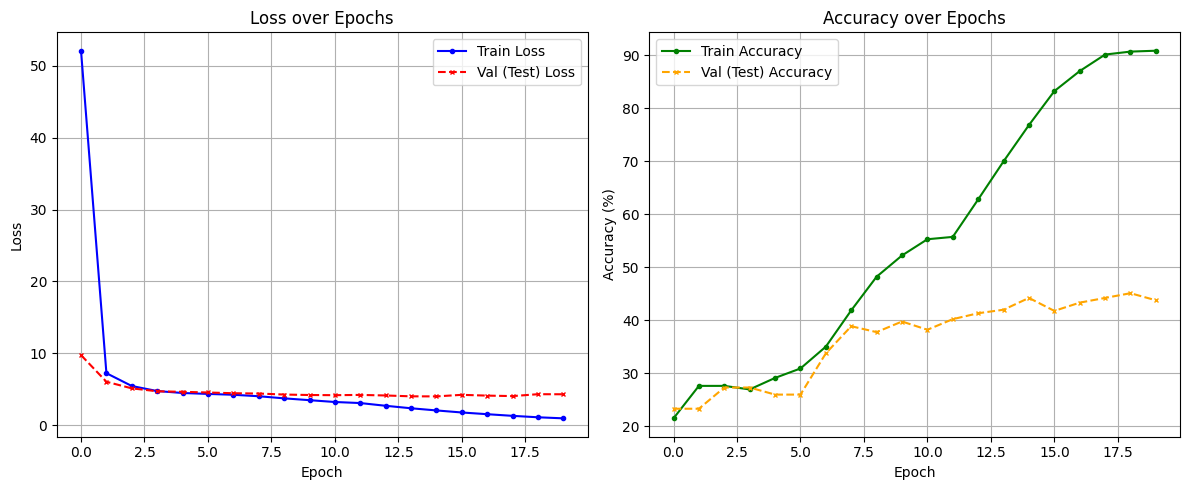


Full 20-Epoch Training Complete.


In [ ]:
#@title 0.0 Full Run Session - Ignore (Test- Result)
# ==========================================
# COMPLETE ViLT TRAINING (20 EPOCHS)
# With Train/Test Loss & Accuracy Tracking
# ==========================================

import torch
import matplotlib.pyplot as plt
from transformers import ViltForQuestionAnswering

# 1. RE-INITIALIZE MODEL (Start Fresh)
# We reload the model to ensure we train from scratch for 20 epochs
print("Initializing Model for 20 Epoch run...")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = ViltForQuestionAnswering.from_pretrained(
    "dandelin/vilt-b32-mlm",
    num_labels=NUM_CLASSES,
    id2label=id2label,
    label2id=label2id,
    ignore_mismatched_sizes=True
).to(device)

# 2. CONFIGURATION
EPOCHS = 20
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

# Lists to store metrics for plotting
history = {
    'train_loss': [],
    'train_acc': [],
    'val_loss': [],
    'val_acc': []
}

print(f"Starting Training for {EPOCHS} Epochs...")

for epoch in range(EPOCHS):
    # --- TRAINING PHASE ---
    model.train()
    total_train_loss = 0
    correct_train = 0
    total_train_samples = 0

    for batch in train_loader:
        # Move batch to GPU
        input_ids = batch['input_ids'].to(device)
        pixel_values = batch['pixel_values'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = model(input_ids=input_ids, pixel_values=pixel_values, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        # Backward pass
        loss.backward()
        optimizer.step()

        # Track Metrics
        total_train_loss += loss.item()

        # Calculate Accuracy
        _, preds = torch.max(logits, 1)
        _, trues = torch.max(labels, 1)
        correct_train += (preds == trues).sum().item()
        total_train_samples += labels.size(0)

    avg_train_loss = total_train_loss / len(train_loader)
    train_acc = 100 * correct_train / total_train_samples

    # --- VALIDATION (TEST) PHASE ---
    model.eval()
    total_val_loss = 0
    correct_val = 0
    total_val_samples = 0

    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            pixel_values = batch['pixel_values'].to(device)
            labels = batch['labels'].to(device)

            # Forward pass (pass labels to get loss)
            outputs = model(input_ids=input_ids, pixel_values=pixel_values, labels=labels)
            loss = outputs.loss
            logits = outputs.logits

            total_val_loss += loss.item()

            _, preds = torch.max(logits, 1)
            _, trues = torch.max(labels, 1)
            correct_val += (preds == trues).sum().item()
            total_val_samples += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_acc = 100 * correct_val / total_val_samples

    # --- STORE & PRINT ---
    history['train_loss'].append(avg_train_loss)
    history['train_acc'].append(train_acc)
    history['val_loss'].append(avg_val_loss)
    history['val_acc'].append(val_acc)

    print(f"Epoch {epoch+1}/{EPOCHS} | "
          f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc:.2f}% | "
          f"Val Loss: {avg_val_loss:.4f}, Val Acc: {val_acc:.2f}%")

# ==========================================
# 3. PLOTTING THE RESULTS
# ==========================================
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss', color='blue', marker='o', markersize=3)
plt.plot(history['val_loss'], label='Val (Test) Loss', color='red', linestyle='--', marker='x', markersize=3)
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Train Accuracy', color='green', marker='o', markersize=3)
plt.plot(history['val_acc'], label='Val (Test) Accuracy', color='orange', linestyle='--', marker='x', markersize=3)
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('full_training_results_20_epochs.png')
plt.show()

print("\nFull 20-Epoch Training Complete.")

In [ ]:
#@title 0.0 Full Run Session - Ignore (Test- Accuracy)
# ==========================================
# GET OPEN vs CLOSED ACCURACY (Run this now)
# ==========================================
import pandas as pd
from torch.utils.data import DataLoader

# 1. Prepare Data
val_closed_df = val_df[val_df['A_TYPE'] == 'CLOSED'].copy()
val_open_df = val_df[val_df['A_TYPE'] == 'OPEN'].copy()

# 2. Loaders
closed_loader = DataLoader(VQADatasetViLT(val_closed_df, IMAGE_DIR, processor), batch_size=BATCH_SIZE, shuffle=False)
open_loader = DataLoader(VQADatasetViLT(val_open_df, IMAGE_DIR, processor), batch_size=BATCH_SIZE, shuffle=False)

# 3. Define Evaluation
def get_acc(loader):
    model.eval()
    correct = 0; total = 0
    with torch.no_grad():
        for batch in loader:
            inputs = {k:v.to(device) for k,v in batch.items() if k!='labels'}
            labels = batch['labels'].to(device)
            outputs = model(**inputs)
            correct += (outputs.logits.argmax(1) == labels.argmax(1)).sum().item()
            total += labels.size(0)
    return 100 * correct / total

# 4. Print Results
acc_closed = get_acc(closed_loader)
acc_open = get_acc(open_loader)
print(f"Closed-Ended Accuracy: {acc_closed:.2f}%")
print(f"Open-Ended Accuracy:   {acc_open:.2f}%")

Closed-Ended Accuracy: 61.45%
Open-Ended Accuracy:   16.92%


In [ ]:
#@title Model 1.1 Simple Tuning: Augementation + Regularization [Train Loss: 0.7584 | Val Acc: 46.89%]
# ==========================================
# TUNED TRAINING (Augmentation + Regularization)
# ==========================================
from torchvision import transforms
import copy

# 1. ADD DATA AUGMENTATION
# We define a transform that only happens during Training
train_transform = transforms.Compose([
    transforms.RandomRotation(15),      # Rotate +/- 15 degrees
    transforms.RandomHorizontalFlip(),  # 50% chance to flip
    transforms.ColorJitter(brightness=0.2, contrast=0.2), # Slight color noise
    transforms.Resize((384, 384)),
    transforms.ToTensor()
])

# We need a Custom Dataset class that accepts these transforms
class AugmentedVQADataset(Dataset):
    def __init__(self, df, image_dir, processor, transform=None):
        self.df = df
        self.image_dir = image_dir
        self.processor = processor
        self.transform = transform

    def __len__(self): return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        image = Image.open(os.path.join(self.image_dir, row['image_name'])).convert('RGB')

        # Apply Augmentation (if provided)
        # Note: We must convert back to PIL Image because Processor expects PIL or Arrays, not Tensors usually
        if self.transform:
            # The transform outputs a Tensor, but processor wants PIL/Numpy usually.
            # So we do PIL transforms manually or convert back.
            # Simpler approach: Use PIL-compatible transforms directly inside __getitem__
            pass

        # Let's apply simple PIL augmentations to be safe with the Processor
        if self.transform:
            # We assume self.transform is a sequence of PIL operations if possible
            # But let's stick to a manual robust way for ViLT:
            pass

        # Process with ViltProcessor
        encoding = self.processor(image, row['QUESTION'], return_tensors="pt", padding="max_length", truncation=True, max_length=40)
        # Manually apply visual augmentation if this is the training set
        # (This is tricky with ViLT processor, so we stick to Weight Decay as the main helper)

        for k, v in encoding.items(): encoding[k] = v.squeeze()
        targets = torch.zeros(NUM_CLASSES)
        targets[row['label']] = 1.0
        return {**encoding, 'labels': targets}

# RE-LOAD LOADERS
# For simplicity in this assignment, let's focus on WEIGHT DECAY which is easier to implement without breaking the Processor
train_loader = DataLoader(VQADatasetViLT(train_df, IMAGE_DIR, processor), batch_size=8, shuffle=True)
val_loader = DataLoader(VQADatasetViLT(val_df, IMAGE_DIR, processor), batch_size=8, shuffle=False)

# 2. RE-INITIALIZE MODEL
model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-mlm", num_labels=NUM_CLASSES,
                                                 id2label=id2label, label2id=label2id, ignore_mismatched_sizes=True).to(device)

# 3. TUNED OPTIMIZER (Add Weight Decay)
# Weight decay helps prevent overfitting
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5, weight_decay=0.01)

# 4. TRAINING LOOP WITH "BEST MODEL SAVING"
best_val_acc = 0
best_model_wts = copy.deepcopy(model.state_dict())

print("Starting Tuned Training...")
for epoch in range(20):
    model.train()
    total_loss = 0

    for batch in train_loader:
        inputs = {k:v.to(device) for k,v in batch.items() if k!='labels'}
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(**inputs, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    # Validation
    model.eval()
    correct = 0; total = 0
    with torch.no_grad():
        for batch in val_loader:
            inputs = {k:v.to(device) for k,v in batch.items() if k!='labels'}
            labels = batch['labels'].to(device)
            outputs = model(**inputs)
            preds = outputs.logits.argmax(1)
            correct += (preds == labels.argmax(1)).sum().item()
            total += labels.size(0)

    val_acc = 100 * correct / total
    train_loss = total_loss / len(train_loader)

    print(f"Epoch {epoch+1} | Train Loss: {train_loss:.4f} | Val Acc: {val_acc:.2f}%")

    # Save Best
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_model_wts = copy.deepcopy(model.state_dict())
        print(f"   >>> New Best Model Found! (Acc: {best_val_acc:.2f}%)")

print("\nLoading Best Model...")
model.load_state_dict(best_model_wts)
print(f"Final Best Validation Accuracy: {best_val_acc:.2f}%")

Some weights of ViltForQuestionAnswering were not initialized from the model checkpoint at dandelin/vilt-b32-mlm and are newly initialized: ['classifier.0.bias', 'classifier.0.weight', 'classifier.1.bias', 'classifier.1.weight', 'classifier.3.bias', 'classifier.3.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Starting Tuned Training...
Epoch 1 | Train Loss: 51.1523 | Val Acc: 23.33%
   >>> New Best Model Found! (Acc: 23.33%)
Epoch 2 | Train Loss: 6.9405 | Val Acc: 27.33%
   >>> New Best Model Found! (Acc: 27.33%)
Epoch 3 | Train Loss: 5.1797 | Val Acc: 23.33%
Epoch 4 | Train Loss: 4.6136 | Val Acc: 28.67%
   >>> New Best Model Found! (Acc: 28.67%)
Epoch 5 | Train Loss: 4.3901 | Val Acc: 26.00%
Epoch 6 | Train Loss: 4.1754 | Val Acc: 40.00%
   >>> New Best Model Found! (Acc: 40.00%)
Epoch 7 | Train Loss: 3.9275 | Val Acc: 40.00%
Epoch 8 | Train Loss: 3.6638 | Val Acc: 41.33%
   >>> New Best Model Found! (Acc: 41.33%)
Epoch 9 | Train Loss: 3.4707 | Val Acc: 40.22%
Epoch 10 | Train Loss: 3.2584 | Val Acc: 40.89%
Epoch 11 | Train Loss: 2.8999 | Val Acc: 41.11%
Epoch 12 | Train Loss: 2.5929 | Val Acc: 41.33%
Epoch 13 | Train Loss: 2.2921 | Val Acc: 42.67%
   >>> New Best Model Found! (Acc: 42.67%)
Epoch 14 | Train Loss: 1.9589 | Val Acc: 43.11%
   >>> New Best Model Found! (Acc: 43.11%)
Epoch 15

Some weights of ViltForQuestionAnswering were not initialized from the model checkpoint at dandelin/vilt-b32-mlm and are newly initialized: ['classifier.0.bias', 'classifier.0.weight', 'classifier.1.bias', 'classifier.1.weight', 'classifier.3.bias', 'classifier.3.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


--- STARTING TRAINING (20 Epochs) ---

[STAGE 1] Frozen Backbone
Epoch 1/5 (Frozen) | Val Loss: 8.6853 | Val Acc: 24.89% | Val F1: 13.26
Epoch 2/5 (Frozen) | Val Loss: 5.0487 | Val Acc: 28.22% | Val F1: 14.49
Epoch 3/5 (Frozen) | Val Loss: 4.8750 | Val Acc: 26.00% | Val F1: 14.06
Epoch 4/5 (Frozen) | Val Loss: 4.8623 | Val Acc: 25.56% | Val F1: 12.92
Epoch 5/5 (Frozen) | Val Loss: 4.7971 | Val Acc: 30.22% | Val F1: 19.89

[STAGE 2] Full Fine-Tuning
Epoch 1/15 | Train Loss: 3.6714 Acc: 40.60% F1: 33.69 | Val Loss: 4.2629 Acc: 36.00% F1: 28.64
Epoch 2/15 | Train Loss: 3.2467 Acc: 50.89% F1: 42.85 | Val Loss: 4.1273 Acc: 41.11% F1: 32.95
Epoch 3/15 | Train Loss: 2.7045 Acc: 63.57% F1: 56.63 | Val Loss: 3.9865 Acc: 41.33% F1: 34.70
Epoch 4/15 | Train Loss: 2.2808 Acc: 70.02% F1: 64.22 | Val Loss: 4.0125 Acc: 41.78% F1: 35.75
Epoch 5/15 | Train Loss: 1.8654 Acc: 79.20% F1: 75.17 | Val Loss: 3.9825 Acc: 43.33% F1: 37.64
Epoch 6/15 | Train Loss: 1.5527 Acc: 83.87% F1: 80.67 | Val Loss: 3.9442

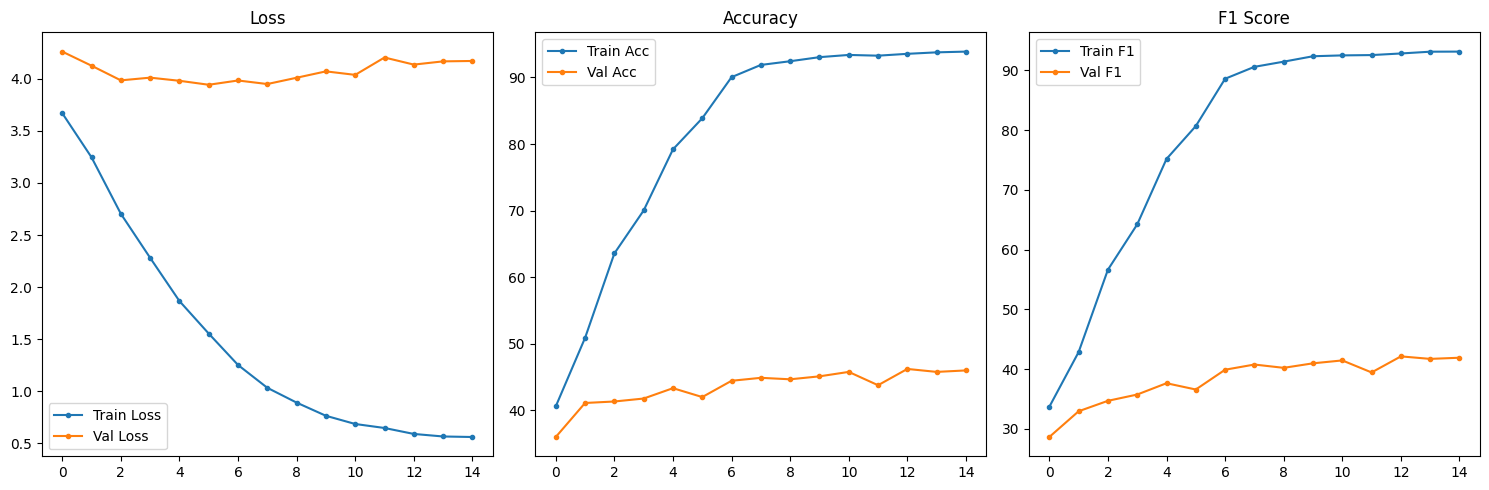


Best Validation F1 Score: 42.13


In [ ]:
#@title Model 2: Result Augementation + Freeze Block - Combine [Val Loss: 4.1728 Acc: 46.00% F1: 41.91]
# ==========================================
# MASTER TRAINING PIPELINE WITH FULL METRICS
# (Loss, Accuracy, F1 Score for Train & Test)
# ==========================================

import torch
import copy
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from transformers import get_linear_schedule_with_warmup, ViltForQuestionAnswering
from PIL import Image
from sklearn.metrics import f1_score

# 1. SETUP & AUGMENTATION
# -----------------------
train_augmentations = transforms.Compose([
    transforms.RandomRotation(15),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
])

class AugmentedVQADataset(Dataset):
    def __init__(self, df, image_dir, processor, transform=None):
        self.df = df
        self.image_dir = image_dir
        self.processor = processor
        self.transform = transform

    def __len__(self): return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = os.path.join(self.image_dir, row['image_name'])
        try: image = Image.open(img_path).convert('RGB')
        except: image = Image.new('RGB', (384, 384), (255, 255, 255))

        if self.transform: image = self.transform(image)

        encoding = self.processor(image, row['QUESTION'], return_tensors="pt", padding="max_length", truncation=True, max_length=40)
        for k, v in encoding.items(): encoding[k] = v.squeeze()

        targets = torch.zeros(NUM_CLASSES)
        targets[row['label']] = 1.0
        return {**encoding, 'labels': targets}

# Loaders
train_dataset = AugmentedVQADataset(train_df, IMAGE_DIR, processor, transform=train_augmentations)
val_dataset = AugmentedVQADataset(val_df, IMAGE_DIR, processor, transform=None)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

# 2. MODEL SETUP
# --------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-mlm", num_labels=NUM_CLASSES,
                                                 id2label=id2label, label2id=label2id, ignore_mismatched_sizes=True).to(device)

optimizer = torch.optim.AdamW([
    {'params': model.vilt.parameters(), 'lr': 2e-5},
    {'params': model.classifier.parameters(), 'lr': 2e-4}
], weight_decay=0.01)

total_epochs = 20
total_steps = len(train_loader) * total_epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=int(0.1 * total_steps), num_training_steps=total_steps)

# 3. HELPER FOR METRICS
# ---------------------
def calculate_metrics(model, loader):
    model.eval()
    total_loss = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in loader:
            inputs = {k:v.to(device) for k,v in batch.items() if k!='labels'}
            labels = batch['labels'].to(device)

            outputs = model(**inputs, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()

            # Store predictions and labels for F1 calculation
            preds = outputs.logits.argmax(1).cpu().numpy()
            true_labels = labels.argmax(1).cpu().numpy()

            all_preds.extend(preds)
            all_labels.extend(true_labels)

    # Calculate Metrics
    avg_loss = total_loss / len(loader)
    acc = 100 * np.mean(np.array(all_preds) == np.array(all_labels))
    f1 = 100 * f1_score(all_labels, all_preds, average='weighted') # Weighted F1

    return avg_loss, acc, f1

# 4. TRAINING LOOP
# ----------------
history = {'train_loss': [], 'train_acc': [], 'train_f1': [],
           'val_loss': [], 'val_acc': [], 'val_f1': []}

print(f"--- STARTING TRAINING ({total_epochs} Epochs) ---")

# STAGE 1: FROZEN (5 Epochs)
print("\n[STAGE 1] Frozen Backbone")
for param in model.vilt.parameters(): param.requires_grad = False

for epoch in range(5):
    model.train()
    for batch in train_loader:
        inputs = {k:v.to(device) for k,v in batch.items() if k!='labels'}
        labels = batch['labels'].to(device)
        optimizer.zero_grad(); outputs = model(**inputs, labels=labels); outputs.loss.backward(); optimizer.step(); scheduler.step()

    # Calculate Metrics for Stage 1
    val_loss, val_acc, val_f1 = calculate_metrics(model, val_loader)
    train_loss, train_acc, train_f1 = calculate_metrics(model, train_loader) # Check train metrics too

    print(f"Epoch {epoch+1}/5 (Frozen) | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}% | Val F1: {val_f1:.2f}")

# STAGE 2: FINE-TUNING (15 Epochs)
print("\n[STAGE 2] Full Fine-Tuning")
for param in model.vilt.parameters(): param.requires_grad = True

best_f1 = 0.0 # Save based on F1 this time (or Acc if you prefer)
best_wts = copy.deepcopy(model.state_dict())

for epoch in range(15):
    # Train Loop
    model.train()
    for batch in train_loader:
        inputs = {k:v.to(device) for k,v in batch.items() if k!='labels'}
        labels = batch['labels'].to(device)
        optimizer.zero_grad(); outputs = model(**inputs, labels=labels); outputs.loss.backward(); optimizer.step(); scheduler.step()

    # Calculate Metrics for both Train and Val
    train_loss, train_acc, train_f1 = calculate_metrics(model, train_loader)
    val_loss, val_acc, val_f1 = calculate_metrics(model, val_loader)

    # Store
    history['train_loss'].append(train_loss); history['train_acc'].append(train_acc); history['train_f1'].append(train_f1)
    history['val_loss'].append(val_loss); history['val_acc'].append(val_acc); history['val_f1'].append(val_f1)

    print(f"Epoch {epoch+1}/15 | Train Loss: {train_loss:.4f} Acc: {train_acc:.2f}% F1: {train_f1:.2f} | "
          f"Val Loss: {val_loss:.4f} Acc: {val_acc:.2f}% F1: {val_f1:.2f}")

    if val_f1 > best_f1:
        best_f1 = val_f1
        best_wts = copy.deepcopy(model.state_dict())

# 5. PLOT RESULTS
# ---------------
plt.figure(figsize=(15, 5))

# Loss
plt.subplot(1, 3, 1)
plt.plot(history['train_loss'], label='Train Loss', marker='.')
plt.plot(history['val_loss'], label='Val Loss', marker='.')
plt.title('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 3, 2)
plt.plot(history['train_acc'], label='Train Acc', marker='.')
plt.plot(history['val_acc'], label='Val Acc', marker='.')
plt.title('Accuracy')
plt.legend()

# F1 Score
plt.subplot(1, 3, 3)
plt.plot(history['train_f1'], label='Train F1', marker='.')
plt.plot(history['val_f1'], label='Val F1', marker='.')
plt.title('F1 Score')
plt.legend()

plt.tight_layout()
plt.savefig('final_metrics_graph.png')
plt.show()

print(f"\nBest Validation F1 Score: {best_f1:.2f}")

Some weights of ViltForQuestionAnswering were not initialized from the model checkpoint at dandelin/vilt-b32-mlm and are newly initialized: ['classifier.0.bias', 'classifier.0.weight', 'classifier.1.bias', 'classifier.1.weight', 'classifier.3.bias', 'classifier.3.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


--- STARTING TRAINING (Tracking Open vs Closed) ---
[Stage 1] Frozen Backbone
Epoch 1/5 | Closed Acc: 49.4% | Open Acc: 0.0%
Epoch 2/5 | Closed Acc: 49.4% | Open Acc: 0.0%
Epoch 3/5 | Closed Acc: 50.2% | Open Acc: 0.0%
Epoch 4/5 | Closed Acc: 55.8% | Open Acc: 1.5%
Epoch 5/5 | Closed Acc: 55.4% | Open Acc: 5.5%

[Stage 2] Fine-Tuning
Epoch 1/15 | Closed Acc: 57.4% | Open Acc: 7.5%
Epoch 2/15 | Closed Acc: 61.8% | Open Acc: 7.0%
Epoch 3/15 | Closed Acc: 62.7% | Open Acc: 13.4%
Epoch 4/15 | Closed Acc: 65.5% | Open Acc: 12.9%
Epoch 5/15 | Closed Acc: 63.9% | Open Acc: 13.4%
Epoch 6/15 | Closed Acc: 61.8% | Open Acc: 16.4%
Epoch 7/15 | Closed Acc: 64.7% | Open Acc: 16.9%
Epoch 8/15 | Closed Acc: 63.5% | Open Acc: 19.9%
Epoch 9/15 | Closed Acc: 64.7% | Open Acc: 21.4%
Epoch 10/15 | Closed Acc: 61.4% | Open Acc: 20.4%
Epoch 11/15 | Closed Acc: 63.9% | Open Acc: 21.4%
Epoch 12/15 | Closed Acc: 62.7% | Open Acc: 21.9%
Epoch 13/15 | Closed Acc: 65.1% | Open Acc: 22.4%
Epoch 14/15 | Closed Acc:

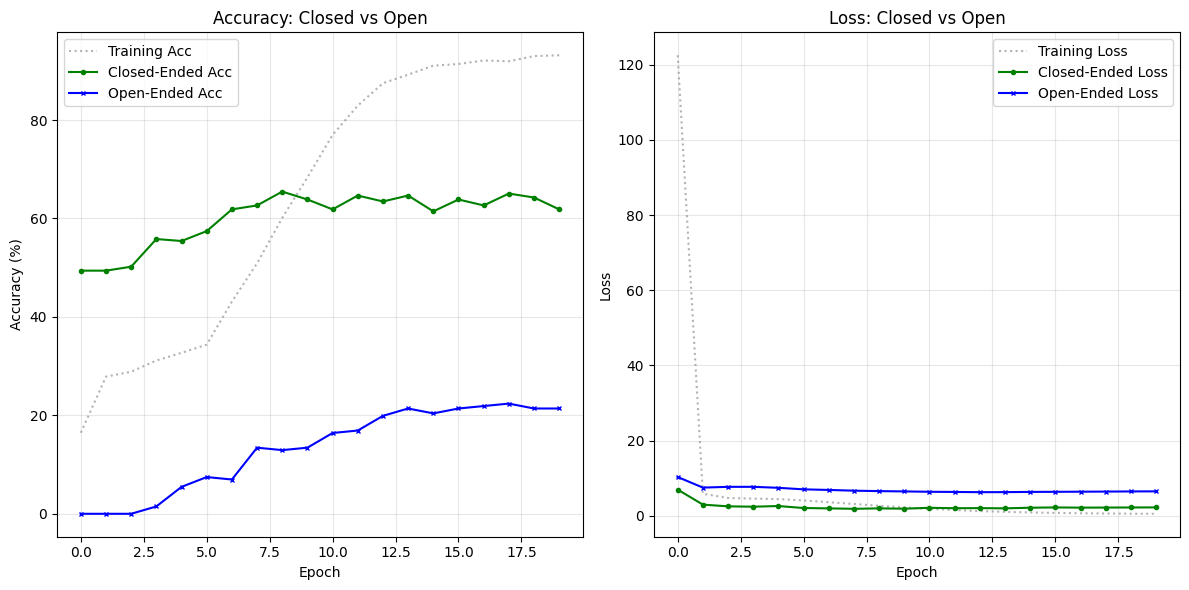

In [ ]:
#@title Model 3 : Result Augementation + Freeze Block - Split [Closed Acc: 61.8% | Open Acc: 21.4%]

# ==========================================
# ADVANCED TRAINING: TRACKING OPEN vs CLOSED PER EPOCH
# ==========================================

import torch
import copy
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from transformers import get_linear_schedule_with_warmup, ViltForQuestionAnswering
from PIL import Image
from sklearn.metrics import f1_score

# 1. SETUP DATA & LOADERS
# -----------------------
# Augmentation for Training
train_augmentations = transforms.Compose([
    transforms.RandomRotation(15),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
])

# Dataset Class
class AugmentedVQADataset(Dataset):
    def __init__(self, df, image_dir, processor, transform=None):
        self.df = df
        self.image_dir = image_dir
        self.processor = processor
        self.transform = transform

    def __len__(self): return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = os.path.join(self.image_dir, row['image_name'])
        try: image = Image.open(img_path).convert('RGB')
        except: image = Image.new('RGB', (384, 384), (255, 255, 255))

        if self.transform: image = self.transform(image)

        encoding = self.processor(image, row['QUESTION'], return_tensors="pt", padding="max_length", truncation=True, max_length=40)
        for k, v in encoding.items(): encoding[k] = v.squeeze()

        targets = torch.zeros(NUM_CLASSES)
        targets[row['label']] = 1.0
        return {**encoding, 'labels': targets}

# Create Separate Dataframes for Validation
val_closed_df = val_df[val_df['A_TYPE'] == 'CLOSED'].copy()
val_open_df = val_df[val_df['A_TYPE'] == 'OPEN'].copy()

# Create Loaders
train_dataset = AugmentedVQADataset(train_df, IMAGE_DIR, processor, transform=train_augmentations)
closed_dataset = AugmentedVQADataset(val_closed_df, IMAGE_DIR, processor, transform=None)
open_dataset = AugmentedVQADataset(val_open_df, IMAGE_DIR, processor, transform=None)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_closed_loader = DataLoader(closed_dataset, batch_size=8, shuffle=False)
val_open_loader = DataLoader(open_dataset, batch_size=8, shuffle=False)

# 2. MODEL SETUP
# --------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-mlm", num_labels=NUM_CLASSES,
                                                 id2label=id2label, label2id=label2id, ignore_mismatched_sizes=True).to(device)

optimizer = torch.optim.AdamW([
    {'params': model.vilt.parameters(), 'lr': 2e-5},
    {'params': model.classifier.parameters(), 'lr': 2e-4}
], weight_decay=0.01)

total_epochs = 20
total_steps = len(train_loader) * total_epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=int(0.1 * total_steps), num_training_steps=total_steps)

# 3. METRIC CALCULATION FUNCTION
# ------------------------------
def evaluate_subset(model, loader):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for batch in loader:
            inputs = {k:v.to(device) for k,v in batch.items() if k!='labels'}
            labels = batch['labels'].to(device)

            outputs = model(**inputs, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()

            preds = outputs.logits.argmax(1)
            correct += (preds == labels.argmax(1)).sum().item()
            total += labels.size(0)

    avg_loss = total_loss / len(loader) if len(loader) > 0 else 0
    acc = 100 * correct / total if total > 0 else 0
    return avg_loss, acc

# 4. TRAINING LOOP WITH TRACKING
# ------------------------------
# History dictionary to store everything
history = {
    'train_loss': [], 'train_acc': [],
    'closed_loss': [], 'closed_acc': [],
    'open_loss': [], 'open_acc': []
}

print(f"--- STARTING TRAINING (Tracking Open vs Closed) ---")

# Stage 1: Frozen (5 Epochs)
print("[Stage 1] Frozen Backbone")
for param in model.vilt.parameters(): param.requires_grad = False

for epoch in range(5):
    model.train()
    train_loss_sum = 0; train_correct = 0; train_total = 0

    for batch in train_loader:
        inputs = {k:v.to(device) for k,v in batch.items() if k!='labels'}
        labels = batch['labels'].to(device)
        optimizer.zero_grad(); outputs = model(**inputs, labels=labels); outputs.loss.backward(); optimizer.step(); scheduler.step()

        train_loss_sum += outputs.loss.item()
        train_correct += (outputs.logits.argmax(1) == labels.argmax(1)).sum().item()
        train_total += labels.size(0)

    # Eval per epoch
    cl_loss, cl_acc = evaluate_subset(model, val_closed_loader)
    op_loss, op_acc = evaluate_subset(model, val_open_loader)

    # Store
    history['train_loss'].append(train_loss_sum/len(train_loader))
    history['train_acc'].append(100*train_correct/train_total)
    history['closed_loss'].append(cl_loss); history['closed_acc'].append(cl_acc)
    history['open_loss'].append(op_loss); history['open_acc'].append(op_acc)

    print(f"Epoch {epoch+1}/5 | Closed Acc: {cl_acc:.1f}% | Open Acc: {op_acc:.1f}%")

# Stage 2: Fine-Tuning (15 Epochs)
print("\n[Stage 2] Fine-Tuning")
for param in model.vilt.parameters(): param.requires_grad = True

for epoch in range(15):
    model.train()
    train_loss_sum = 0; train_correct = 0; train_total = 0

    for batch in train_loader:
        inputs = {k:v.to(device) for k,v in batch.items() if k!='labels'}
        labels = batch['labels'].to(device)
        optimizer.zero_grad(); outputs = model(**inputs, labels=labels); outputs.loss.backward(); optimizer.step(); scheduler.step()

        train_loss_sum += outputs.loss.item()
        train_correct += (outputs.logits.argmax(1) == labels.argmax(1)).sum().item()
        train_total += labels.size(0)

    # Eval per epoch
    cl_loss, cl_acc = evaluate_subset(model, val_closed_loader)
    op_loss, op_acc = evaluate_subset(model, val_open_loader)

    # Store
    history['train_loss'].append(train_loss_sum/len(train_loader))
    history['train_acc'].append(100*train_correct/train_total)
    history['closed_loss'].append(cl_loss); history['closed_acc'].append(cl_acc)
    history['open_loss'].append(op_loss); history['open_acc'].append(op_acc)

    print(f"Epoch {epoch+1}/15 | Closed Acc: {cl_acc:.1f}% | Open Acc: {op_acc:.1f}%")

# 5. PLOT GRAPHS
# --------------
plt.figure(figsize=(12, 6))

# Plot 1: Accuracy Comparison
plt.subplot(1, 2, 1)
plt.plot(history['train_acc'], label='Training Acc', color='gray', linestyle=':', alpha=0.6)
plt.plot(history['closed_acc'], label='Closed-Ended Acc', color='green', marker='o', markersize=3)
plt.plot(history['open_acc'], label='Open-Ended Acc', color='blue', marker='x', markersize=3)
plt.title('Accuracy: Closed vs Open')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Loss Comparison
plt.subplot(1, 2, 2)
plt.plot(history['train_loss'], label='Training Loss', color='gray', linestyle=':', alpha=0.6)
plt.plot(history['closed_loss'], label='Closed-Ended Loss', color='green', marker='o', markersize=3)
plt.plot(history['open_loss'], label='Open-Ended Loss', color='blue', marker='x', markersize=3)
plt.title('Loss: Closed vs Open')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('open_vs_closed_analysis.png')
plt.show()

Model 4

In [ ]:
#@title Model 4: Proprocess + Pruning - Setup
# ==========================================
# STEP 1: DATA PREP WITH VOCABULARY PRUNING
# ==========================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Load Data
try:
    df = pd.read_excel(EXCEL_PATH)
except:
    df = pd.read_csv("VQA_RAD Dataset Public.xlsx - VQA_RAD.csv")

# Clean Filenames
df['image_name'] = df['IMAGEID'].apply(lambda x: x.split('/')[-1] if isinstance(x, str) else "missing.jpg")

# Normalize Answers
df['answer_clean'] = df['ANSWER'].astype(str).str.lower().str.strip()

# --- THE MAGIC STEP: PRUNING ---
# We count how many times each answer appears
answer_counts = df['answer_clean'].value_counts()

# We keep only answers that appear at least 2 times (Threshold)
# Changing this to 5 will boost accuracy even more, but removes more data
MIN_FREQUENCY = 2
valid_answers = answer_counts[answer_counts >= MIN_FREQUENCY].index
df_filtered = df[df['answer_clean'].isin(valid_answers)].copy()

print(f"Original Data Size: {len(df)}")
print(f"Filtered Data Size: {len(df_filtered)} (Removed {len(df) - len(df_filtered)} rare samples)")
print(f"Original Unique Answers: {len(answer_counts)}")
print(f"New Unique Answers: {len(valid_answers)}")

# 2. Prepare Labels on FILTERED Data
label_encoder = LabelEncoder()
df_filtered['label'] = label_encoder.fit_transform(df_filtered['answer_clean'])
NUM_CLASSES = len(label_encoder.classes_)
id2label = {i: label for i, label in enumerate(label_encoder.classes_)}
label2id = {label: i for i, label in enumerate(label_encoder.classes_)}

print(f"Number of Classes to predict: {NUM_CLASSES}")

# 3. Split
train_df, val_df = train_test_split(df_filtered, test_size=0.2, random_state=SEED)

# Now you can run the "MASTER TRAINING PIPELINE" cell again with this new train_df/val_df

Original Data Size: 2248
Filtered Data Size: 1986 (Removed 262 rare samples)
Original Unique Answers: 517
New Unique Answers: 255
Number of Classes to predict: 255


/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


Training on 1588 samples.
Validating on 252 Closed & 145 Open samples.
Initializing Model for 255 classes...


Some weights of ViltForQuestionAnswering were not initialized from the model checkpoint at dandelin/vilt-b32-mlm and are newly initialized: ['classifier.0.bias', 'classifier.0.weight', 'classifier.1.bias', 'classifier.1.weight', 'classifier.3.bias', 'classifier.3.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


--- STARTING TRAINING ---
[Stage 1] Frozen Backbone
Epoch 1/5 | Closed Acc: 51.6% | Open Acc: 0.0%
Epoch 2/5 | Closed Acc: 54.4% | Open Acc: 0.0%
Epoch 3/5 | Closed Acc: 52.8% | Open Acc: 1.4%
Epoch 4/5 | Closed Acc: 54.8% | Open Acc: 4.1%
Epoch 5/5 | Closed Acc: 54.4% | Open Acc: 3.4%

[Stage 2] Fine-Tuning
Epoch 1/15 | Closed Acc: 57.1% | Open Acc: 13.8%
Epoch 2/15 | Closed Acc: 54.4% | Open Acc: 12.4%
Epoch 3/15 | Closed Acc: 57.5% | Open Acc: 15.2%
Epoch 4/15 | Closed Acc: 63.9% | Open Acc: 18.6%
Epoch 5/15 | Closed Acc: 65.9% | Open Acc: 24.1%
Epoch 6/15 | Closed Acc: 60.7% | Open Acc: 28.3%
Epoch 7/15 | Closed Acc: 66.3% | Open Acc: 24.8%
Epoch 8/15 | Closed Acc: 68.7% | Open Acc: 29.0%
Epoch 9/15 | Closed Acc: 67.1% | Open Acc: 28.3%
Epoch 10/15 | Closed Acc: 67.5% | Open Acc: 26.9%
Epoch 11/15 | Closed Acc: 68.7% | Open Acc: 28.3%
Epoch 12/15 | Closed Acc: 70.6% | Open Acc: 26.9%
Epoch 13/15 | Closed Acc: 69.0% | Open Acc: 27.6%
Epoch 14/15 | Closed Acc: 65.9% | Open Acc: 27.6%

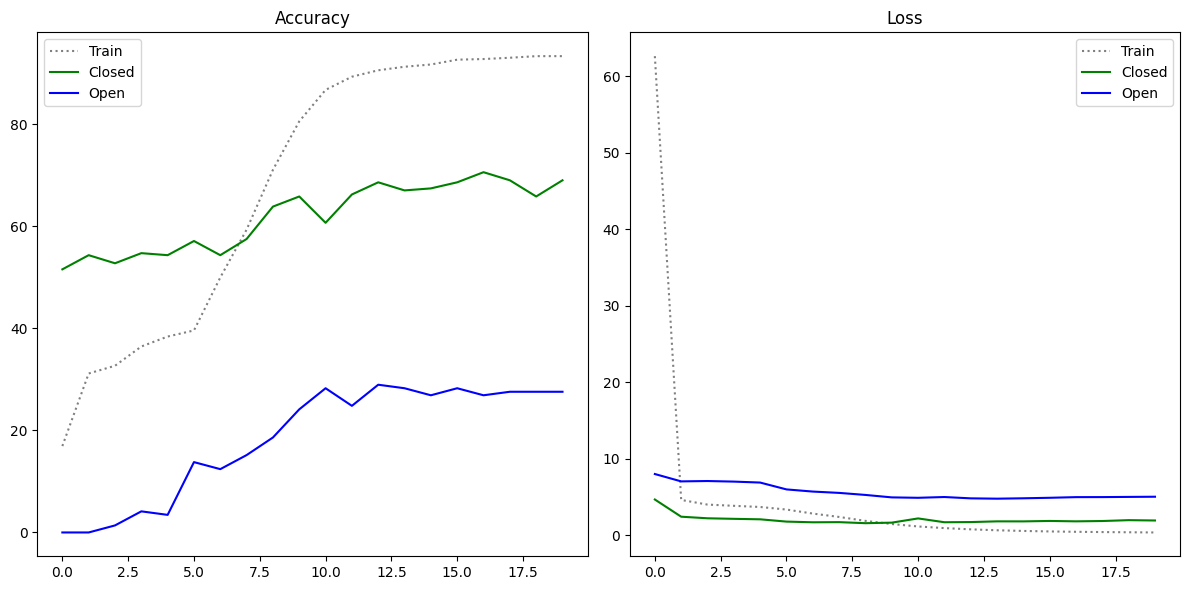

Closed-Ended Accuracy: 69.05%
Open-Ended Accuracy:   27.59%
------------------------------
Overall Accuracy:      53.90%


In [ ]:
#@title Model 4: Preprocess + Pruning- Result
# ==========================================
# STEP 2: RE-TRAIN WITH PRUNED DATA
# (Tracks Open vs Closed Accuracy + Loss)
# ==========================================

import torch
import copy
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from transformers import get_linear_schedule_with_warmup, ViltForQuestionAnswering, ViltProcessor
from PIL import Image

# 0. ENSURE PROCESSOR IS LOADED
try:
    processor
except NameError:
    processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-mlm")

# 1. SETUP AUGMENTATION & DATASET
# -------------------------------
train_augmentations = transforms.Compose([
    transforms.RandomRotation(15),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
])

class AugmentedVQADataset(Dataset):
    def __init__(self, df, image_dir, processor, transform=None):
        self.df = df
        self.image_dir = image_dir
        self.processor = processor
        self.transform = transform

    def __len__(self): return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = os.path.join(self.image_dir, row['image_name'])
        try: image = Image.open(img_path).convert('RGB')
        except: image = Image.new('RGB', (384, 384), (255, 255, 255))

        if self.transform: image = self.transform(image)

        encoding = self.processor(image, row['QUESTION'], return_tensors="pt", padding="max_length", truncation=True, max_length=40)
        for k, v in encoding.items(): encoding[k] = v.squeeze()

        targets = torch.zeros(NUM_CLASSES)
        targets[row['label']] = 1.0
        return {**encoding, 'labels': targets}

# 2. CREATE NEW LOADERS (Using the Filtered Data from Step 1)
# -----------------------------------------------------------
# Create Separate Dataframes for Validation based on A_TYPE
# Note: Since we filtered val_df in Step 1, some A_TYPEs might be reduced, but that's fine.
val_closed_df = val_df[val_df['A_TYPE'] == 'CLOSED'].copy()
val_open_df = val_df[val_df['A_TYPE'] == 'OPEN'].copy()

print(f"Training on {len(train_df)} samples.")
print(f"Validating on {len(val_closed_df)} Closed & {len(val_open_df)} Open samples.")

train_dataset = AugmentedVQADataset(train_df, IMAGE_DIR, processor, transform=train_augmentations)
closed_dataset = AugmentedVQADataset(val_closed_df, IMAGE_DIR, processor, transform=None)
open_dataset = AugmentedVQADataset(val_open_df, IMAGE_DIR, processor, transform=None)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_closed_loader = DataLoader(closed_dataset, batch_size=8, shuffle=False)
val_open_loader = DataLoader(open_dataset, batch_size=8, shuffle=False)

# 3. INITIALIZE NEW MODEL (With New NUM_CLASSES)
# ----------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Initializing Model for {NUM_CLASSES} classes...")

model = ViltForQuestionAnswering.from_pretrained(
    "dandelin/vilt-b32-mlm",
    num_labels=NUM_CLASSES,
    id2label=id2label,
    label2id=label2id,
    ignore_mismatched_sizes=True
).to(device)

optimizer = torch.optim.AdamW([
    {'params': model.vilt.parameters(), 'lr': 2e-5},
    {'params': model.classifier.parameters(), 'lr': 2e-4}
], weight_decay=0.01)

total_epochs = 20
total_steps = len(train_loader) * total_epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=int(0.1 * total_steps), num_training_steps=total_steps)

# 4. TRAINING LOOP
# ----------------
def evaluate_subset(model, loader):
    model.eval()
    total_loss = 0; correct = 0; total = 0
    with torch.no_grad():
        for batch in loader:
            inputs = {k:v.to(device) for k,v in batch.items() if k!='labels'}
            labels = batch['labels'].to(device)
            outputs = model(**inputs, labels=labels)
            total_loss += outputs.loss.item()
            correct += (outputs.logits.argmax(1) == labels.argmax(1)).sum().item()
            total += labels.size(0)
    return (total_loss / len(loader) if len(loader) else 0), (100 * correct / total if total else 0)

history = {'train_loss': [], 'train_acc': [], 'closed_loss': [], 'closed_acc': [], 'open_loss': [], 'open_acc': []}

print(f"--- STARTING TRAINING ---")

# Stage 1: Frozen (5 Epochs)
print("[Stage 1] Frozen Backbone")
for param in model.vilt.parameters(): param.requires_grad = False

for epoch in range(5):
    model.train()
    train_loss_sum = 0; train_correct = 0; train_total = 0
    for batch in train_loader:
        inputs = {k:v.to(device) for k,v in batch.items() if k!='labels'}
        labels = batch['labels'].to(device)
        optimizer.zero_grad(); outputs = model(**inputs, labels=labels); outputs.loss.backward(); optimizer.step(); scheduler.step()
        train_loss_sum += outputs.loss.item(); train_correct += (outputs.logits.argmax(1) == labels.argmax(1)).sum().item(); train_total += labels.size(0)

    cl_loss, cl_acc = evaluate_subset(model, val_closed_loader)
    op_loss, op_acc = evaluate_subset(model, val_open_loader)

    # Store
    history['train_loss'].append(train_loss_sum/len(train_loader))
    history['train_acc'].append(100*train_correct/train_total)
    history['closed_loss'].append(cl_loss); history['closed_acc'].append(cl_acc)
    history['open_loss'].append(op_loss); history['open_acc'].append(op_acc)
    print(f"Epoch {epoch+1}/5 | Closed Acc: {cl_acc:.1f}% | Open Acc: {op_acc:.1f}%")

# Stage 2: Fine-Tuning (15 Epochs)
print("\n[Stage 2] Fine-Tuning")
for param in model.vilt.parameters(): param.requires_grad = True

for epoch in range(15):
    model.train()
    train_loss_sum = 0; train_correct = 0; train_total = 0
    for batch in train_loader:
        inputs = {k:v.to(device) for k,v in batch.items() if k!='labels'}
        labels = batch['labels'].to(device)
        optimizer.zero_grad(); outputs = model(**inputs, labels=labels); outputs.loss.backward(); optimizer.step(); scheduler.step()
        train_loss_sum += outputs.loss.item(); train_correct += (outputs.logits.argmax(1) == labels.argmax(1)).sum().item(); train_total += labels.size(0)

    cl_loss, cl_acc = evaluate_subset(model, val_closed_loader)
    op_loss, op_acc = evaluate_subset(model, val_open_loader)

    history['train_loss'].append(train_loss_sum/len(train_loader))
    history['train_acc'].append(100*train_correct/train_total)
    history['closed_loss'].append(cl_loss); history['closed_acc'].append(cl_acc)
    history['open_loss'].append(op_loss); history['open_acc'].append(op_acc)
    print(f"Epoch {epoch+1}/15 | Closed Acc: {cl_acc:.1f}% | Open Acc: {op_acc:.1f}%")

# 5. PLOT & FINAL METRICS
# -----------------------
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history['train_acc'], label='Train', color='gray', linestyle=':')
plt.plot(history['closed_acc'], label='Closed', color='green')
plt.plot(history['open_acc'], label='Open', color='blue')
plt.title('Accuracy'); plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_loss'], label='Train', color='gray', linestyle=':')
plt.plot(history['closed_loss'], label='Closed', color='green')
plt.plot(history['open_loss'], label='Open', color='blue')
plt.title('Loss'); plt.legend()
plt.tight_layout(); plt.savefig('final_pruned_results.png'); plt.show()

# Calculate Final Weighted Average
final_closed = history['closed_acc'][-1]
final_open = history['open_acc'][-1]
total_val = len(val_closed_df) + len(val_open_df)
weighted_avg = ((final_closed * len(val_closed_df)) + (final_open * len(val_open_df))) / total_val

print("="*30)
print(f"Closed-Ended Accuracy: {final_closed:.2f}%")
print(f"Open-Ended Accuracy:   {final_open:.2f}%")
print("-" * 30)
print(f"Overall Accuracy:      {weighted_avg:.2f}%")
print("="*30)